# Integral Equation Model Comparisons
[DOI: https://doi.org/10.1103/PhysRevB.100.155143](https://doi.org/10.1103/PhysRevB.100.155143)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

from hnc.hnc.PIE import Plasma_of_Ions_and_Electrons as PLASMA

from hnc.hnc.constants import *
from hnc.hnc.misc import n_from_rs

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
                
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

</style>
""")


### Set Parameters in Paper and Plot

In [2]:
name = 'Hydrogen'
Z, A = 1,1 

Te_eV = 1 # eV
Ti_eV = Te_eV
ri_AU = 1#0.4473 # AU
ri_cm = ri_AU/cm_to_AU
ni_cc = n_from_rs(ri_cm)

def g_comparison(ax):
    # text = r"{0}\n$n_{{i}}$ [cc]$ =$ {1:.2e}".format(name,ni_cc)
    text = r"{0}\\$n_i= ${1:.2e}[cc]\\ $T$ = {2:.3f} [eV]\\ $r_s$ = {3:.3f} ".format(name,ni_cc, Te_eV, ri_AU)
    props = dict(boxstyle='round', facecolor='w')
    ax.text(0.05,0.97, text, fontsize=15, transform=ax.transAxes, verticalalignment='top', bbox=props)
    
    ax.set_ylabel(r"$g_{ij}$", fontsize=20)
    ax.set_xlabel(r"$r$ [AU]", fontsize=20)
    ax.tick_params(labelsize=15)
    ax.legend(fontsize=14, loc='upper right')
    
# fig, ax = plt.subplots(figsize=(8,6))
# g_comparison(ax)

#### Run Ornstein-Zernike Closure

In [3]:
# c_s_k_guess = plasma_oz.hnc.c_s_k_matrix.copy()

In [3]:
plasma_oz_geom = PLASMA(Z, A, ni_cc, Ti_eV, Te_eV, Zbar=Z,
                 βu_options = {'add_bridge':False,'bridge':'ocp', 'pseudopotential':False}, 
                 qsp_options= {'r_c':0,'which_Tij':'geometric'},
                 hnc_options= {'kappa_multiscale':10, 'R_max':20,'N_bins':1000, 
                               'h_max':2e2,'oz_method':'standard'},
                 hnc_solve_options={'alpha_Picard':0.5, 'num_iterations':1e4})

plasma_oz_geom.run_hnc()#c_s_k_guess = c_s_k_guess)

Te_in_eV: 1.000
Ti_in_eV: 1.000
0: Initial condition Total Error: 3.920e+00
Exiting status 0, reverting to best index so far: 244
Final iter:245, Total Error: 9.804e-09


#### See How Ion By Itself Does

In [5]:
plasma_oz_geom.run_onlyion_hnc()

0: Initial condition Total Error: 8.481e+00
Exiting status 0, reverting to best index so far: 219
Final iter:220, Total Error: 9.628e-09


## Compare Models

(0.0, 5.0)

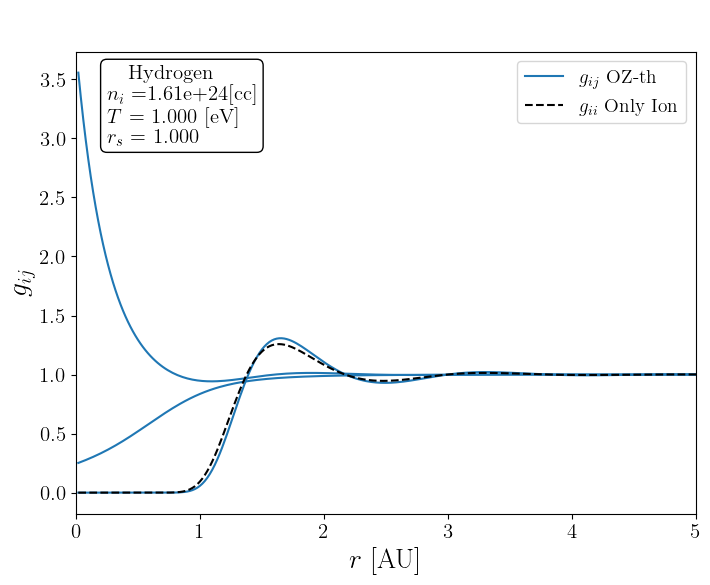

In [6]:
fig, ax = plt.subplots(figsize=(8,6), facecolor='w')
fig.suptitle("  ", fontsize=25, y=0.95)

ax.plot(plasma_oz_geom.hnc.r_array*ri_AU, plasma_oz_geom.hnc.h_r_matrix[1,1]+1, color=colors[0], label=r'$g_{ij}$ OZ-th')
ax.plot(plasma_oz_geom.hnc.r_array*ri_AU, plasma_oz_geom.hnc.h_r_matrix[1,0]+1, color=colors[0])#, label=r'$g_{ei}$ OZ-th')
ax.plot(plasma_oz_geom.hnc.r_array*ri_AU, plasma_oz_geom.hnc.h_r_matrix[0,0]+1, color=colors[0])#, label=r'$g_{ii}$ OZ-th')

ax.plot(plasma_oz_geom.hnc.r_array*ri_AU, plasma_oz_geom.onlyion_hnc.h_r_matrix[0,0]+1, 'k--', label=r'$g_{ii}$ Only Ion')

g_comparison(ax)
ax.set_xlim(0,ri_AU*5)
